Lab 3: Training an image classifier using CNN

For example, we will be discussing about details of CNN based model traning forc ats and dogs images. But, do explore other Image classfications datasets for CNN and try our running a classfier for the same. 
https://www.imageannotation.ai/blog/top-10-image-datasets-for-machine-learning
https://datasetsearch.research.google.com/


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Data"

In [ ]:
%cd /content/gdrive/My Drive/Data/train/person

/content/gdrive/My Drive/Data/train/person


In [ ]:
!wget -i person_.txt

In [ ]:
# !unzip \*.zip
# import os
list = os.listdir("/content/gdrive/My Drive/Data/train/person")
number_files = len(list)
print (number_files)
# !cp -a /content/gdrive/My\ Drive/temp/temp /content/gdrive/My\ Drive/Data/train/person

202


In [ ]:
!wget --no-check-certificate \
  https://www-old.emt.tugraz.at/~pinz/data/GRAZ_01/persons.zip

In [ ]:
!wget --no-check-certificate \https://www-old.emt.tugraz.at/~pinz/data/GRAZ_01/bikes.zip

In [ ]:
!unzip \*.zip

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/gdrive/My Drive/Data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_bikes_dir = os.path.join(train_dir, 'bike')
train_helmet_dir = os.path.join(train_dir, 'helmet')
train_person_dir = os.path.join(train_dir, 'person')

test_bikes_dir = os.path.join(test_dir, 'bike')
test_helmet_dir = os.path.join(test_dir, 'helmet')
test_person_dir = os.path.join(test_dir, 'person')

In [ ]:
print('train bike :', len(os.listdir(train_bikes_dir) ))
print('train helmet :', len(os.listdir(train_helmet_dir ) ))
print('train person :', len(os.listdir(train_person_dir ) ))

print('test bike :', len(os.listdir( test_bikes_dir ) ))
print('test helmet :', len(os.listdir( test_helmet_dir ) ))
print('test person :', len(os.listdir( test_person_dir ) ))

train bike : 195
train helmet : 201
train person : 206
test bike : 40
test helmet : 40
test person : 40


In [ ]:
# %cd /content/gdrive/My Drive/temp/temp
# #!ls
# import os, sys
# collection = "/content/gdrive/My Drive/temp/temp"
# for i, filename in enumerate(os.listdir(collection)): 
#         dst ="img" + str(i) + ".jpg"
#         src = filename
#         os.rename(src, dst)

/content/gdrive/My Drive/temp/temp


In [ ]:
BATCH_SIZE = 10
IMG_SHAPE  = 150
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')

Found 600 images belonging to 3 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

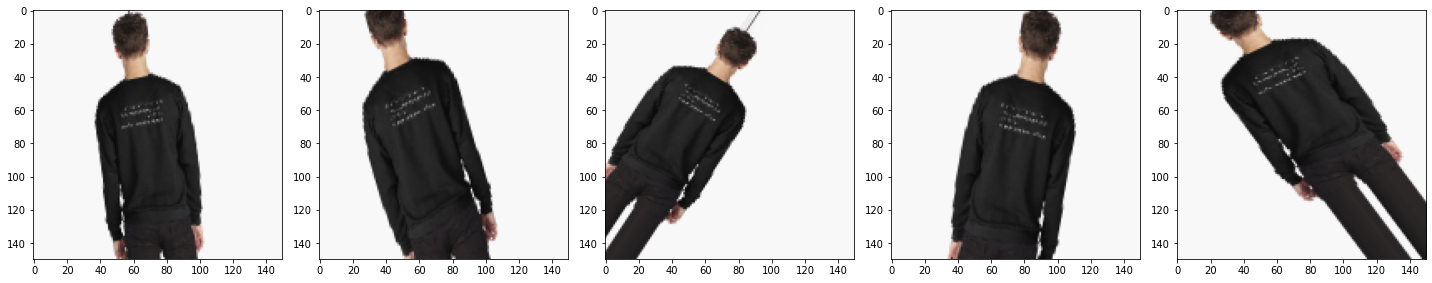

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', 
             optimizer=RMSprop(lr=0.001), 
             metrics=['acc'])

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit("/content/gdrive/My Drive/Data/persons", epochs=10)

In [ ]:
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )    

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 120 images belonging to 3 classes.


In [ ]:
history = model.fit(train_data_gen,
                              validation_data=test_generator,
                              #steps_per_epoch=60,
                              epochs=30,
                              #validation_steps=24,
                              verbose=2)

Epoch 1/30
60/60 - 9s - loss: 1.2228 - acc: 0.4000 - val_loss: 1.1151 - val_acc: 0.3917
Epoch 2/30
60/60 - 9s - loss: 0.9589 - acc: 0.5767 - val_loss: 0.8537 - val_acc: 0.6250
Epoch 3/30
60/60 - 9s - loss: 0.8129 - acc: 0.6950 - val_loss: 0.8348 - val_acc: 0.7667
Epoch 4/30
60/60 - 9s - loss: 0.6974 - acc: 0.7150 - val_loss: 0.9347 - val_acc: 0.7250
Epoch 5/30
60/60 - 9s - loss: 0.6831 - acc: 0.7700 - val_loss: 0.8848 - val_acc: 0.8167
Epoch 6/30
60/60 - 9s - loss: 0.6260 - acc: 0.7483 - val_loss: 0.7791 - val_acc: 0.8000
Epoch 7/30
60/60 - 9s - loss: 0.6324 - acc: 0.7783 - val_loss: 0.5509 - val_acc: 0.8417
Epoch 8/30
60/60 - 9s - loss: 0.5764 - acc: 0.7850 - val_loss: 0.5565 - val_acc: 0.8500
Epoch 9/30
60/60 - 9s - loss: 0.5281 - acc: 0.8033 - val_loss: 0.8663 - val_acc: 0.8250
Epoch 10/30
60/60 - 9s - loss: 0.5363 - acc: 0.7917 - val_loss: 0.6371 - val_acc: 0.7917
Epoch 11/30
60/60 - 9s - loss: 0.4968 - acc: 0.8317 - val_loss: 0.5244 - val_acc: 0.8333
Epoch 12/30
60/60 - 9s - loss:

Text(0.5, 1.0, 'Training and test loss')

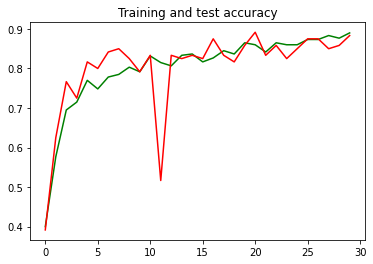

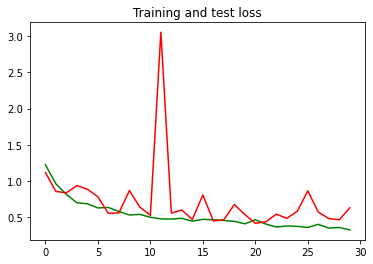

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 


plt.plot  ( epochs, acc , 'g')
plt.plot  ( epochs, val_acc , 'r')
plt.title ('Training and test accuracy')
plt.figure()

plt.plot  ( epochs, loss , 'g' )
plt.plot  ( epochs, val_loss , 'r')
plt.title ('Training and test loss'   )

In [ ]:
# %cd /content/gdrive/My Drive/Data
# model.save('minor3.h5')

/content/gdrive/My Drive/Data


In [ ]:
# !pip install np_utils

In [ ]:
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
%cd /content/gdrive/My Drive/Data
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/gdrive/My Drive/Data/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  img=image.img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  #img=np.expand_dims(img, axis=0)
  #print(img)
  img = img / 255.0
  model = load_model('minor3.h5')
  classes = ['two wheeler', 'helmet', 'person' ]
  result = model.predict_classes(img)
  print(result)
  prediction = model.predict(img)
  print(prediction)
  MaxPosition=np.argmax(prediction)  
  prediction_label=classes[MaxPosition]
  print(prediction_label)
  # y_proba = model.predict(img)
  # y_classes = to_categorical(y_proba)
  # print(y_classes)

/content/gdrive/My Drive/Data


Saving SikhMotorcycle.jpg to SikhMotorcycle.jpg
[0]
[[0.9660438  0.03168192 0.00227428]]
two wheeler


In [ ]:
from glob import glob
%cd /content/gdrive/My Drive/Data/train
class_names = glob("*") # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))

print(name_id_map)

/content/gdrive/My Drive/Data/train
{'bike': 0, 'helmet': 1, 'person': 2}


In [ ]:
#cleanup the kernal

import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/My Drive/Data/minor3.h5')

In [ ]:
import cv2
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
from keras.preprocessing import image 

%cd /content/gdrive/My Drive/temp/video

def FrameCapture(pathIn):
  vidcap = cv2.VideoCapture(pathIn)
  success,im = vidcap.read()
  count = 0
  num = 0
  gate = False
  while success:
    # img = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite("/content/gdrive/My Drive/temp/video/images1/frame%d.jpg" % count, img)
    success,im = vidcap.read()
    num +=1
    print("frame%d.jpg" % num, success)
    count += 0.1

/content/gdrive/My Drive/temp/video


In [ ]:
FrameCapture("/content/gdrive/My Drive/temp/video/test1.mp4")

frame1.jpg True
frame2.jpg True
frame3.jpg True
frame4.jpg True
frame5.jpg True
frame6.jpg True
frame7.jpg True
frame8.jpg True
frame9.jpg True
frame10.jpg True
frame11.jpg True
frame12.jpg True
frame13.jpg True
frame14.jpg True
frame15.jpg True
frame16.jpg True
frame17.jpg True
frame18.jpg True
frame19.jpg True
frame20.jpg True
frame21.jpg True
frame22.jpg True
frame23.jpg True
frame24.jpg True
frame25.jpg True
frame26.jpg True
frame27.jpg True
frame28.jpg True
frame29.jpg True
frame30.jpg True
frame31.jpg True
frame32.jpg True
frame33.jpg True
frame34.jpg True
frame35.jpg True
frame36.jpg True
frame37.jpg True
frame38.jpg True
frame39.jpg True
frame40.jpg True
frame41.jpg True
frame42.jpg True
frame43.jpg True
frame44.jpg True
frame45.jpg True
frame46.jpg True
frame47.jpg True
frame48.jpg True
frame49.jpg True
frame50.jpg True
frame51.jpg True
frame52.jpg True
frame53.jpg True
frame54.jpg True
frame55.jpg True
frame56.jpg True
frame57.jpg True
frame58.jpg True
frame59.jpg True
frame6

In [ ]:
import os
from keras.preprocessing import image
i=0
gate = False
for filename in os.listdir('/content/gdrive/My Drive/temp/video/images/'): 
  i+=1 
  img=image.load_img("/content/gdrive/My Drive/temp/video/images/frame%d.jpg" % i, target_size=(150, 150))
  img=image.img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  #img=np.expand_dims(img, axis=0)
  #print(img)
  img = img / 255.0
  classes = ['two wheeler', 'helmet', 'person' ]
  prediction = model.predict(img)
  print(prediction[0][0], prediction[0][1], prediction[0][2])
  if((prediction[0][0]>0.009) and (prediction[0][1]>0.009) and (prediction[0][2]>0.009)):
    gate= True
  else:
    gate=False
  print("Frame %d Gate open: %s"%(i,gate))

0.98017454 0.017680703 0.0021448145
Frame 1 Gate open: False
0.43667704 0.43523845 0.12808448
Frame 2 Gate open: True
0.91935676 0.065070376 0.015572964
Frame 3 Gate open: True
0.13778453 0.021331418 0.84088403
Frame 4 Gate open: True
0.77763027 0.12907907 0.09329063
Frame 5 Gate open: True
0.63623226 0.046396993 0.31737074
Frame 6 Gate open: True
0.97069204 0.010216788 0.019091196
Frame 7 Gate open: True
0.8443655 0.012571282 0.1430633
Frame 8 Gate open: True
0.26352426 0.010371124 0.7261046
Frame 9 Gate open: True
0.46373373 0.014278968 0.52198726
Frame 10 Gate open: True
0.40993837 0.019786045 0.5702756
Frame 11 Gate open: True
0.14968878 0.004919855 0.8453914
Frame 12 Gate open: False
0.09649967 0.0030465515 0.9004538
Frame 13 Gate open: False
0.1908346 0.0032572565 0.8059082
Frame 14 Gate open: False
0.30928767 0.00811796 0.68259436
Frame 15 Gate open: False
0.36804816 0.021310657 0.61064124
Frame 16 Gate open: True
0.3912345 0.019908855 0.58885664
Frame 17 Gate open: True
0.06456

FileNotFoundError: ignored

In [ ]:
%cd /content/gdrive/My Drive/temp/video/images1
!rm ./*jpg

# import os
# list = os.listdir('/content/gdrive/My Drive/temp/video/images')
# print(len(list))

/content/gdrive/My Drive/temp/video/images1


In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= './images/testing/'
pathOut = 'video.avi'
fps = 0.5
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()